# Análisis exploratorio de datos sobre el cáncer de mama

## Importación y carga del dataset

### Importaciones

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import json


### Función para comprobar si existe el dataset

In [2]:
def checkFile(nameFile):
    # Compruebo si existe el archivo en el directorio actual de trabajo
    current_directory = os.getcwd()
    entries = os.listdir(current_directory)  # Listo todos los archivos
    return nameFile in entries  # Devuelvo True si el archivo existe


In [3]:
nameFile = "Cancer_Data.csv"
if checkFile(nameFile):
    data = pd.read_csv(nameFile)
    print(f"Dataset {nameFile} cargado.")
else:
    print(f"Ha ocurrido algún problema y no se pudo cargar")


Dataset Cancer_Data.csv cargado.


## FASES EDA

### 0 - Créditos

Dataset obtenido de la url: https://www.kaggle.com/datasets/erdemtaha/cancer-data (créditos a Erdem Taha).


### 1 - Comprensión de los datos

### Descripción de los Datos  

#### Identificación del Paciente  
- **id**: Representa un ID único de cada paciente.  

#### Diagnóstico  
- **diagnosis**: Indica el tipo de cáncer. Esta propiedad puede tomar los siguientes valores:  
  - **"M"**: Maligno - Benigno  
  - **"B"**: Benigno - Maligno  

#### Características Categóricas  
Existen varias características categóricas en las que los pacientes están etiquetados con valores numéricos. Puedes examinarlas en el área del gráfico.  

#### Rango de Valores Promedio  
Algunas características contienen rangos específicos de valores promedio de las imágenes del cáncer:  
- **radius_mean**  
- **texture_mean**  
- **perimeter_mean**  
- **area_mean**  
- **smoothness_mean**  
- **compactness_mean**  
- **concavity_mean**  
- **concave points_mean**  


#### 1.1-Encabezado de los datos

In [4]:
print(data.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

Tenemos una muestra de 5 filas y 33 columnas

#### 1.2 - Info. básica

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

No tenemos valores nulos y hay un total de 569 filas, todas ellas numéricas excepto diagnosis (target), que es categórica en 2 posibilidades ("M","B")

### 2 - Análisis descriptivo

In [6]:
print (data.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

Veamos estos datos:

**count**: Número de valores no nulos en la columna.
**mean**: Media (promedio) de los valores.
**std**: Desviación estándar, que mide la dispersión de los datos.
**min**: Valor mínimo en la columna.
**25%**: Primer cuartil (percentil 25), es decir, el valor por debajo del cual está el 25% de los datos.
**50%** (mediana): Valor central de la distribución.
**75%**: Tercer cuartil (percentil 75), es decir, el valor por debajo del cual está el 75% de los datos.
**max**: Valor máximo en la columna.

Tenemos una columna desconocida llamada Unnamed con valores NaN (not a number). Esta columna debe ser eliminada en la fase de ingeniería de características, igual que la columna ID, que a efectos de entrenamiento de un modelo no van a servir.
Para facilitar el análisis, las eliminaremos en el siguiente paso.



### 3-Limpieza de los datos

In [7]:
#Eliminación de id y unnamed
data2 = data.drop(columns = ['id','Unnamed: 32'])
print(data2.describe())

       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

#### 3.1-Exploración sobre las estadísticas descritas

In [8]:

def extract_variation(minDic, maxDic) -> dict:
    resultDic = {}
    for key, value in maxDic.items():  
        if key == "diagnosis":  
            continue
        else:
            resultDic[key] = maxDic[key] - minDic[key]  
    return resultDic
            
def toJsonFormated(dict):
    return json.dumps(dict, indent = 4)
    

In [9]:
#Extraer los mínimos en un diccionario de cada columna y los máximos en otro diccionario.
dictMin = data2.min().to_dict()  
dictMax = data2.max().to_dict()  

print("Mínimos:", toJsonFormated(dictMin))
print("Máximos:",  toJsonFormated(dictMax))

dictVariation = extract_variation(dictMin,dictMax)

#Lo transformo a JSON para mejor visualización y lo ordeno de menor a mayor.
print("Variación diccionario ordenado: ", toJsonFormated(dict(sorted(dictVariation.items(),key=lambda item: item[1]))))





Mínimos: {
    "diagnosis": "B",
    "radius_mean": 6.981,
    "texture_mean": 9.71,
    "perimeter_mean": 43.79,
    "area_mean": 143.5,
    "smoothness_mean": 0.05263,
    "compactness_mean": 0.01938,
    "concavity_mean": 0.0,
    "concave points_mean": 0.0,
    "symmetry_mean": 0.106,
    "fractal_dimension_mean": 0.04996,
    "radius_se": 0.1115,
    "texture_se": 0.3602,
    "perimeter_se": 0.757,
    "area_se": 6.802,
    "smoothness_se": 0.001713,
    "compactness_se": 0.002252,
    "concavity_se": 0.0,
    "concave points_se": 0.0,
    "symmetry_se": 0.007882,
    "fractal_dimension_se": 0.0008948,
    "radius_worst": 7.93,
    "texture_worst": 12.02,
    "perimeter_worst": 50.41,
    "area_worst": 185.2,
    "smoothness_worst": 0.07117,
    "compactness_worst": 0.02729,
    "concavity_worst": 0.0,
    "concave points_worst": 0.0,
    "symmetry_worst": 0.1565,
    "fractal_dimension_worst": 0.05504
}
Máximos: {
    "diagnosis": "M",
    "radius_mean": 28.11,
    "texture_mean"

**"perimeter_se": 21.223,
    "radius_worst": 28.11,
    "texture_mean": 29.57,
    "texture_worst": 37.519999999999996,
    "perimeter_mean": 144.71,
    "perimeter_worst": 200.79,
    "area_se": 535.398,
    "area_mean": 2357.5,
    "area_worst": 4068.8**
    Estos son los elementos con más variación o rango entre el máximo y el mínimo

#### 3.2-Distribución de los datos

In [10]:
#Comparación de media y mediana para saber si la distribución es sesgada o simétrica
numeric_columns = data2.select_dtypes(include=['number']).columns

dictMedian = data2[numeric_columns].median()
dictMean = data2[numeric_columns].mean()


for column in numeric_columns:
    print(f"Columna: {column}")
    print(f"Media: {dictMean[column]}")
    print(f"Mediana: {dictMedian[column]}")
    if dictMean[column] > dictMedian[column]:
        print("Distribución sesgada a la derecha (positiva)")
    elif dictMean[column] < dictMedian[column]:
        print("Distribución sesgada a la izquierda (negativa)")
    else:
        print("Distribución simétrica")
    print("-" * 40)

Columna: radius_mean
Media: 14.127291739894552
Mediana: 13.37
Distribución sesgada a la derecha (positiva)
----------------------------------------
Columna: texture_mean
Media: 19.289648506151142
Mediana: 18.84
Distribución sesgada a la derecha (positiva)
----------------------------------------
Columna: perimeter_mean
Media: 91.96903339191564
Mediana: 86.24
Distribución sesgada a la derecha (positiva)
----------------------------------------
Columna: area_mean
Media: 654.8891036906855
Mediana: 551.1
Distribución sesgada a la derecha (positiva)
----------------------------------------
Columna: smoothness_mean
Media: 0.0963602811950791
Mediana: 0.09587
Distribución sesgada a la derecha (positiva)
----------------------------------------
Columna: compactness_mean
Media: 0.10434098418277679
Mediana: 0.09263
Distribución sesgada a la derecha (positiva)
----------------------------------------
Columna: concavity_mean
Media: 0.0887993158172232
Mediana: 0.06154
Distribución sesgada a la derec

Es posible que existan valores atípicos o outliers que empujan hacia la derecha la distribución, lo que la hace no simétrica. Esto puede tener con la naturaleza de los datos, ya que es normal que existan tumores atípicamente grandes y la mayoría serán pequeños.
No obstante, en la fase de ingeniería de características, será necesario eliminar estos posibles outliers.

#### 3.3-Histogramas

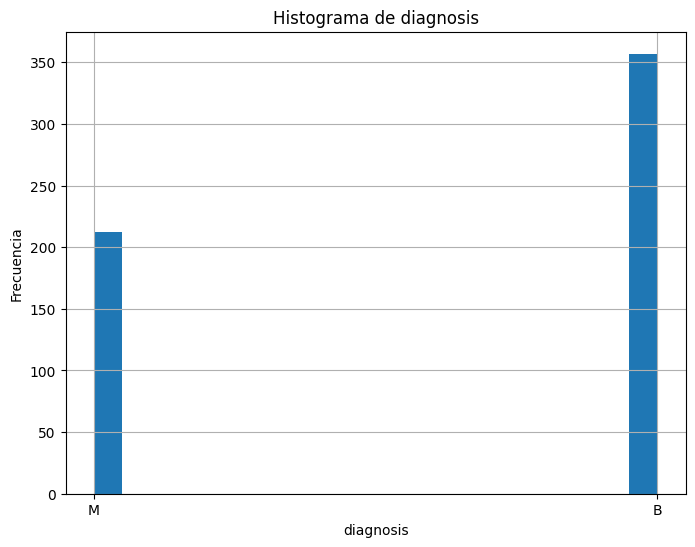

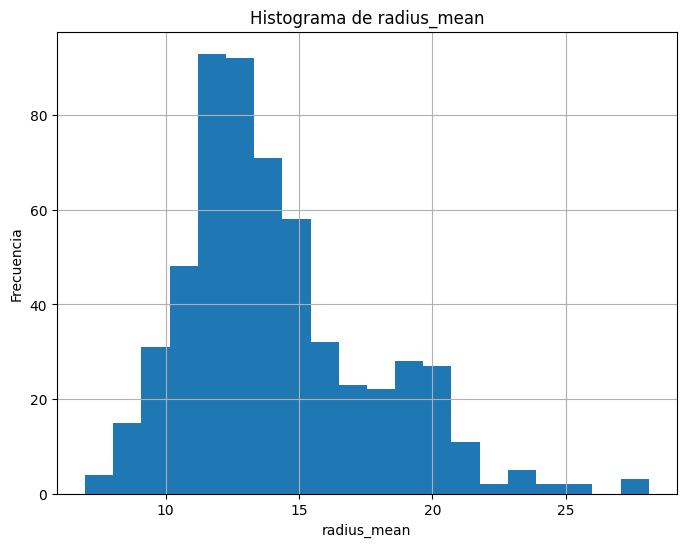

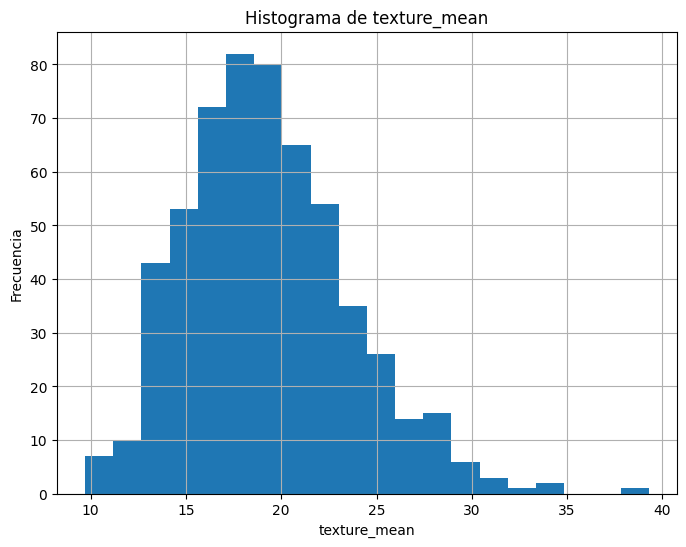

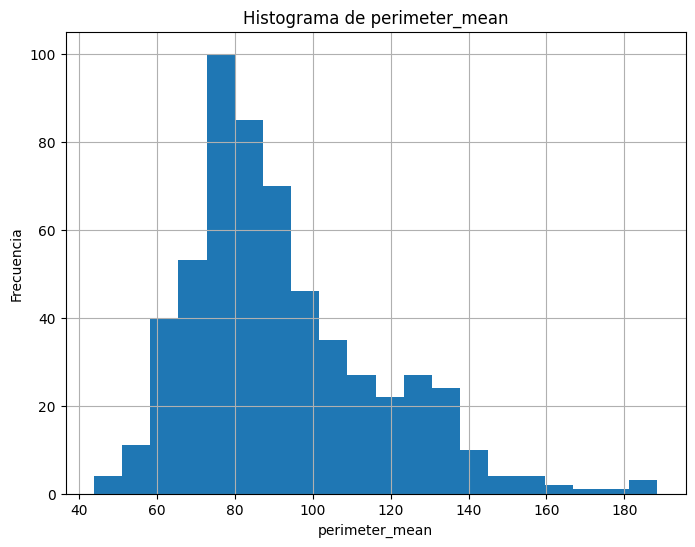

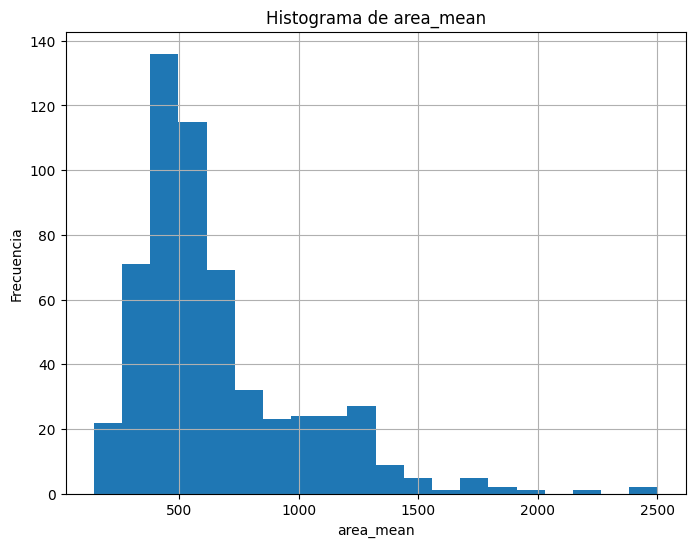

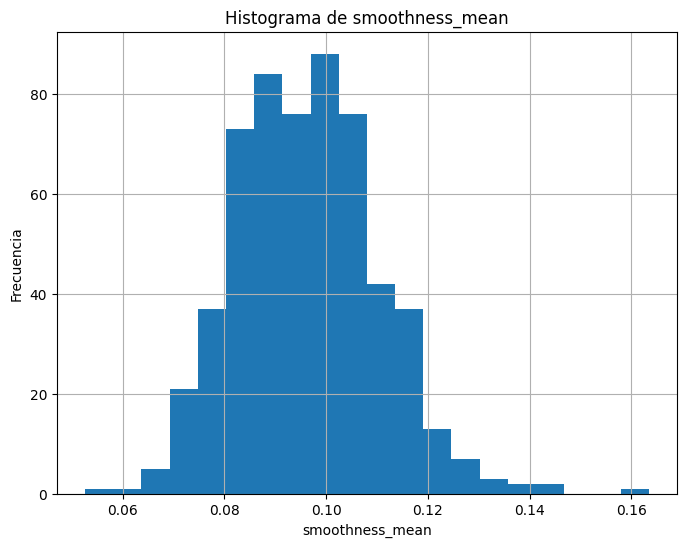

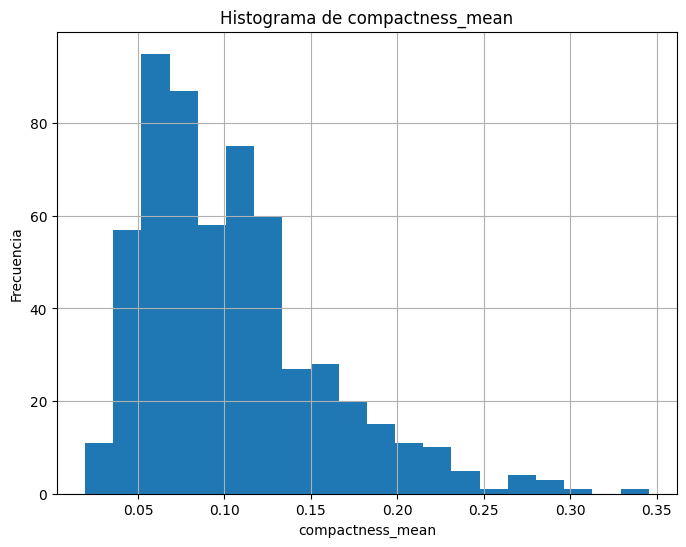

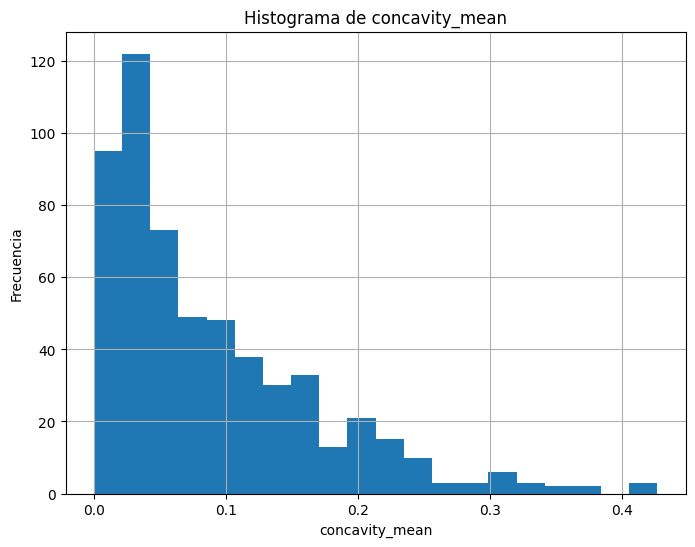

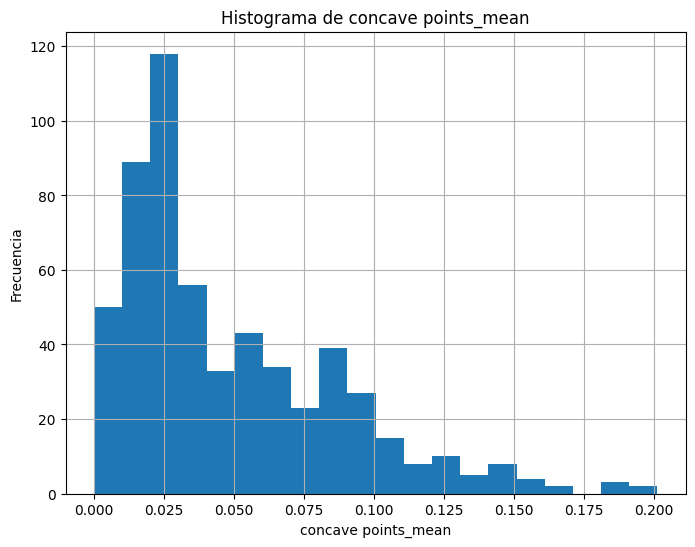

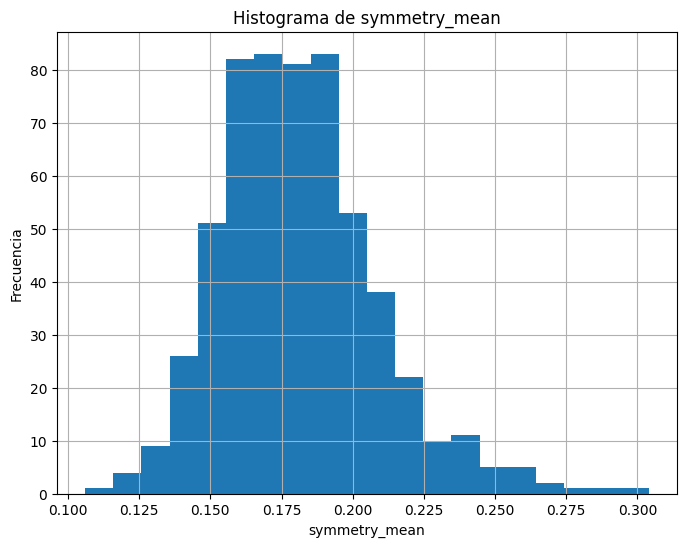

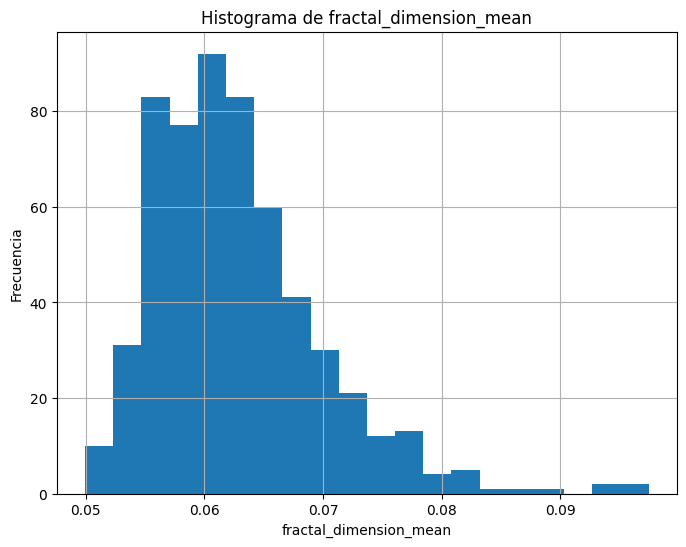

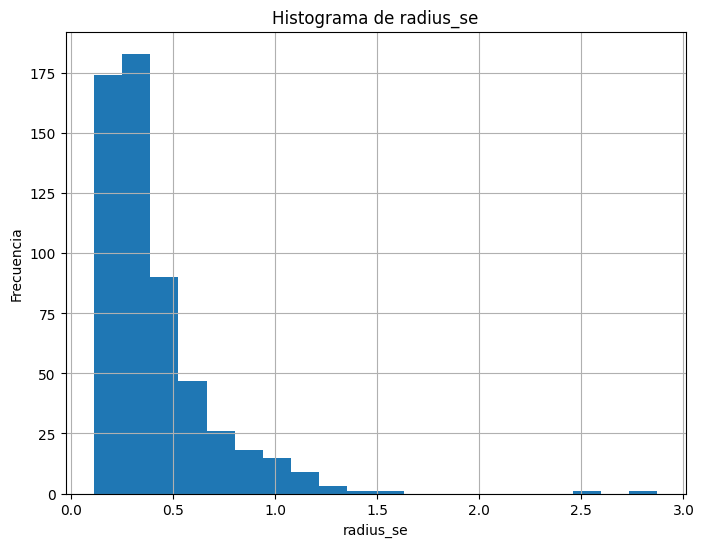

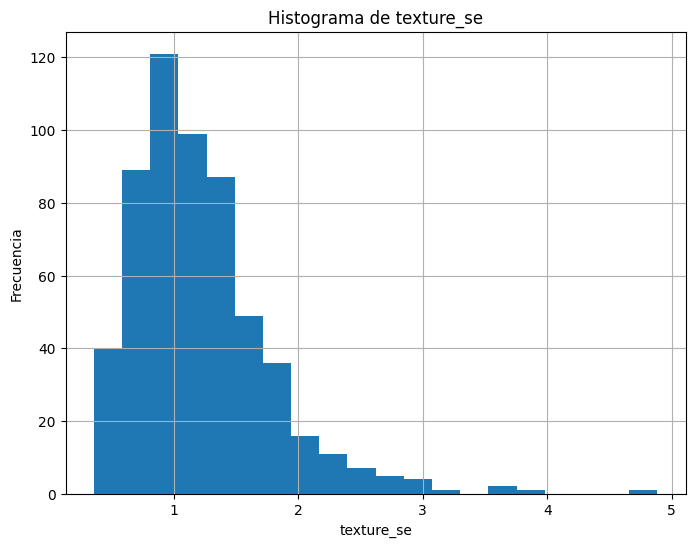

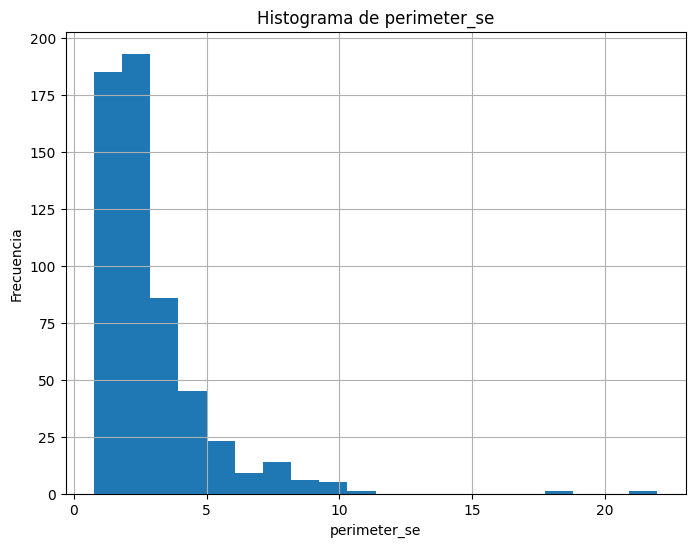

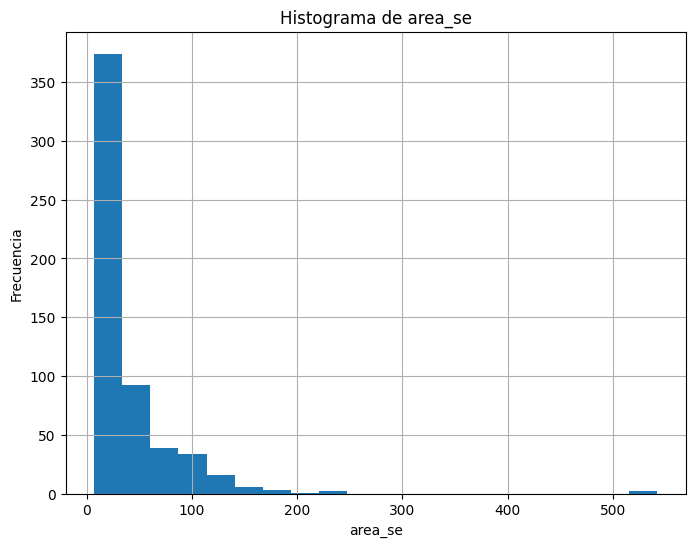

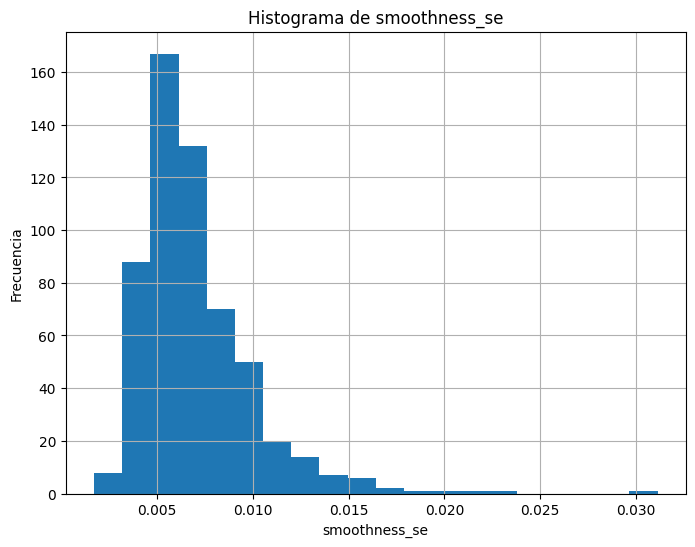

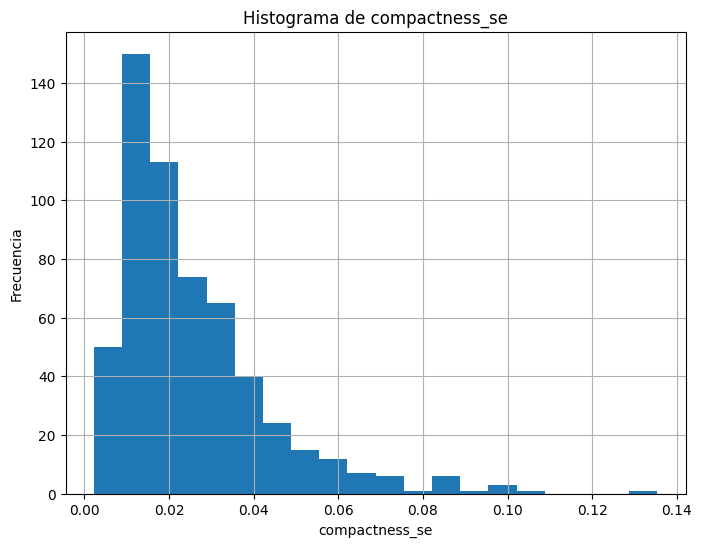

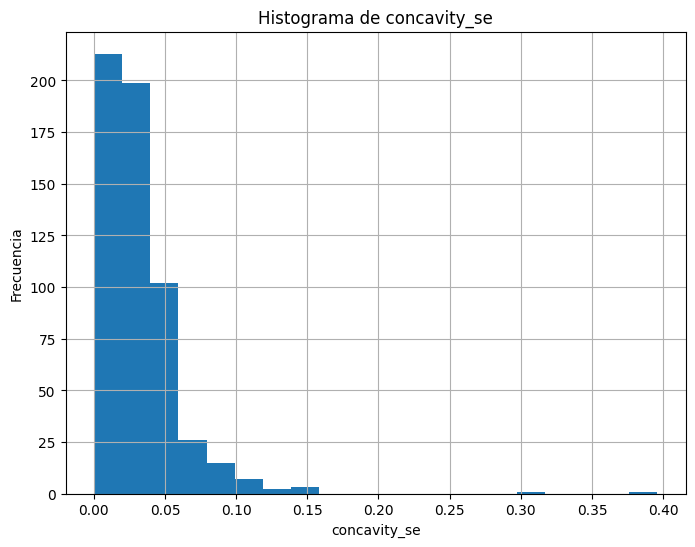

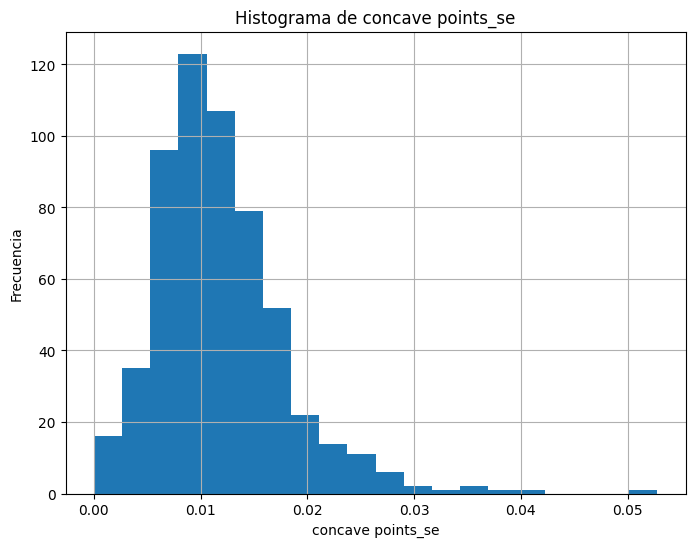

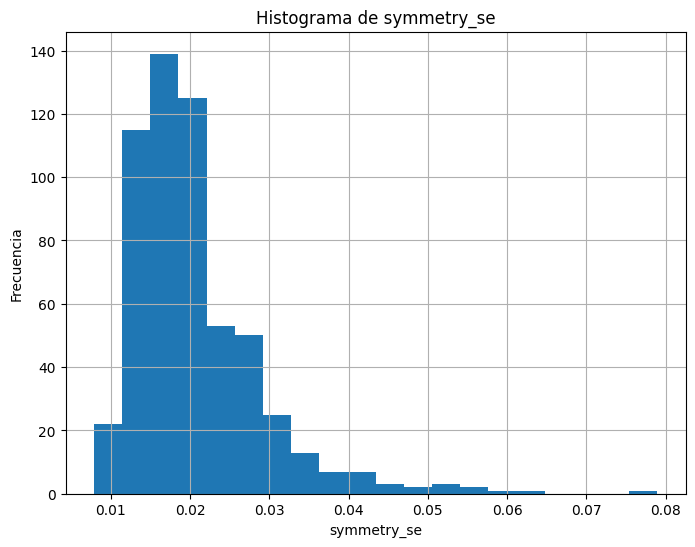

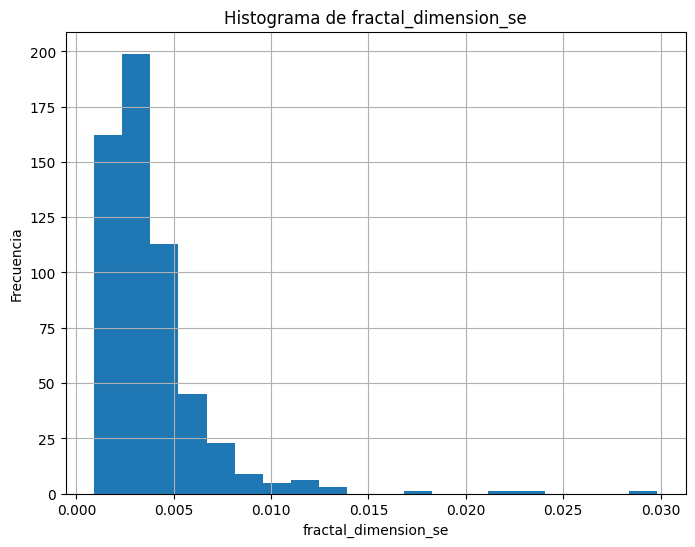

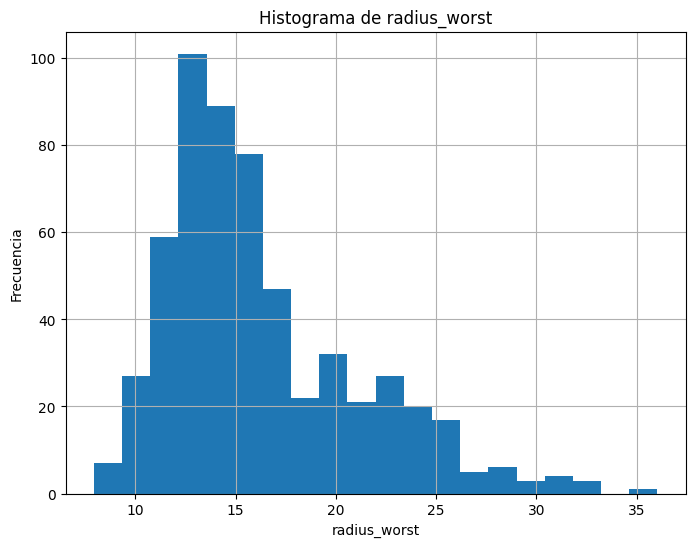

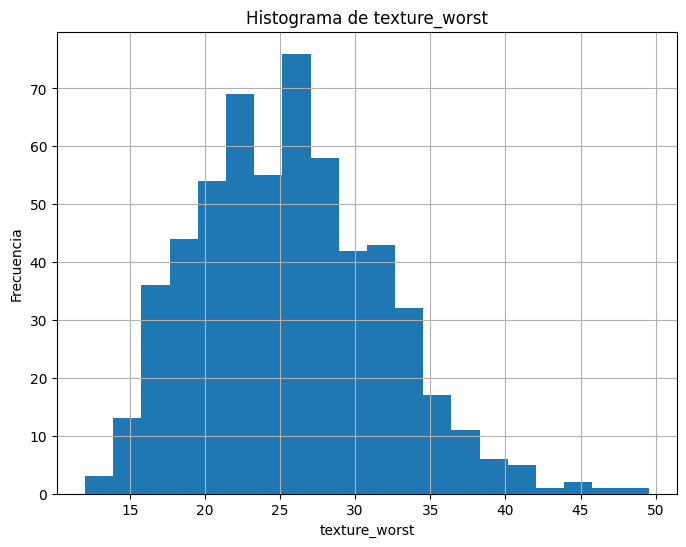

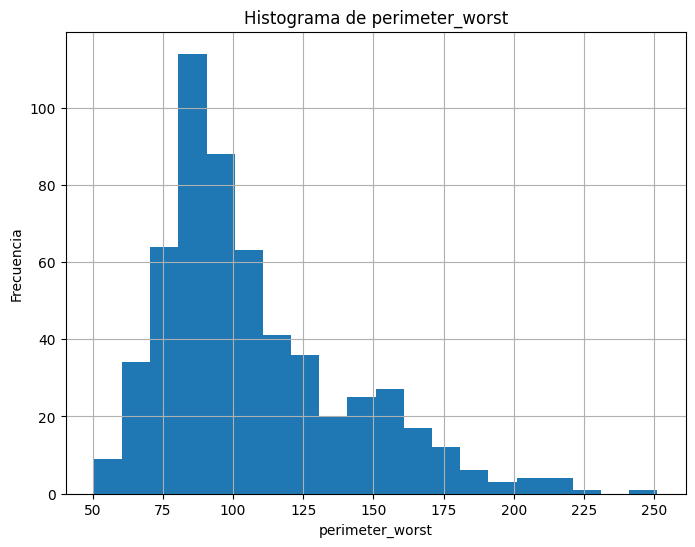

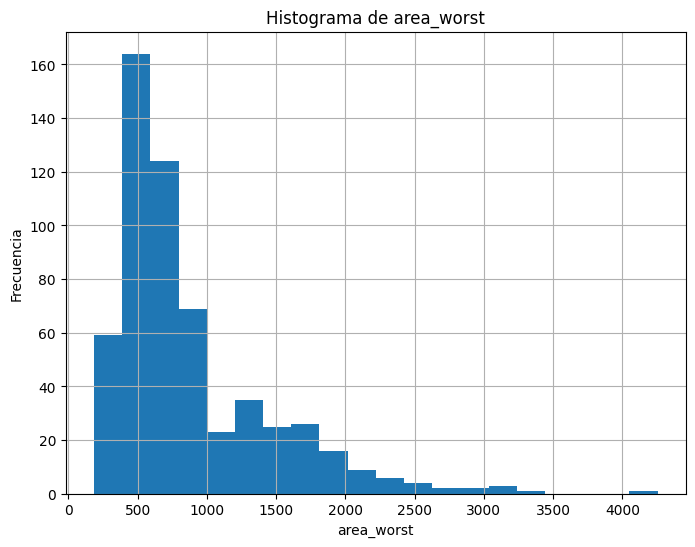

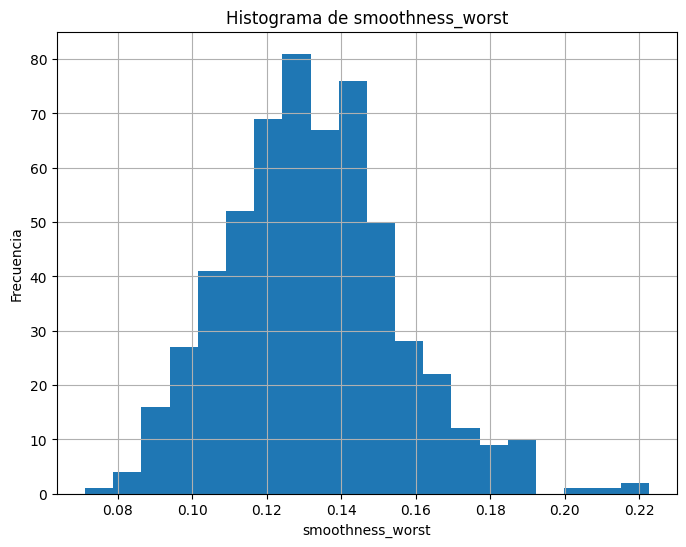

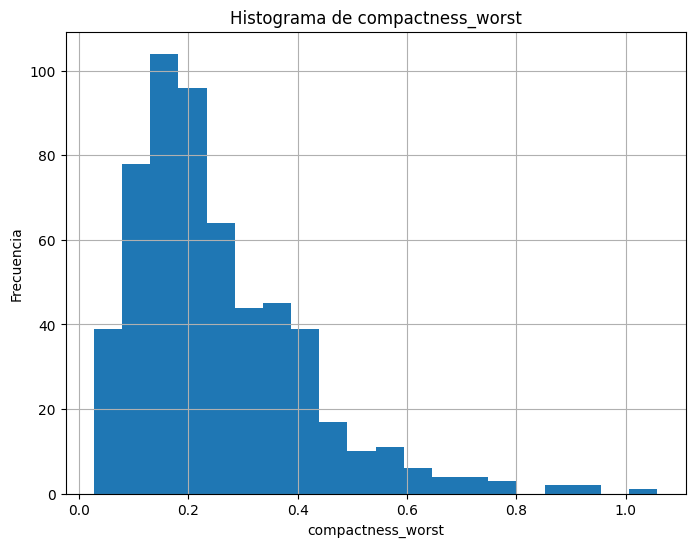

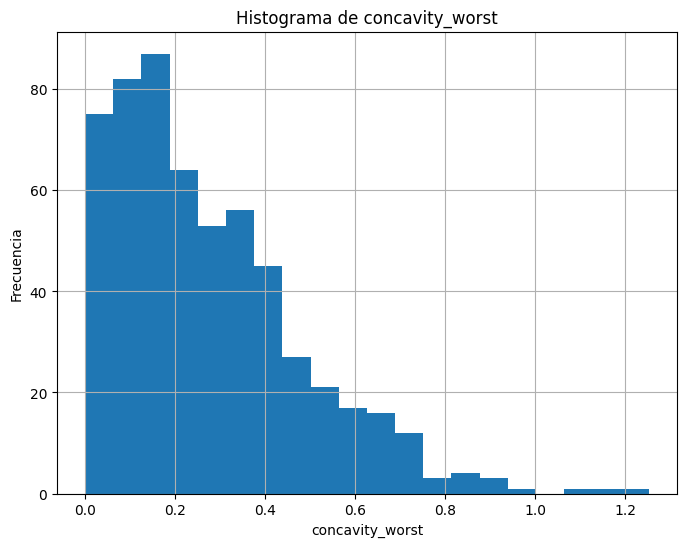

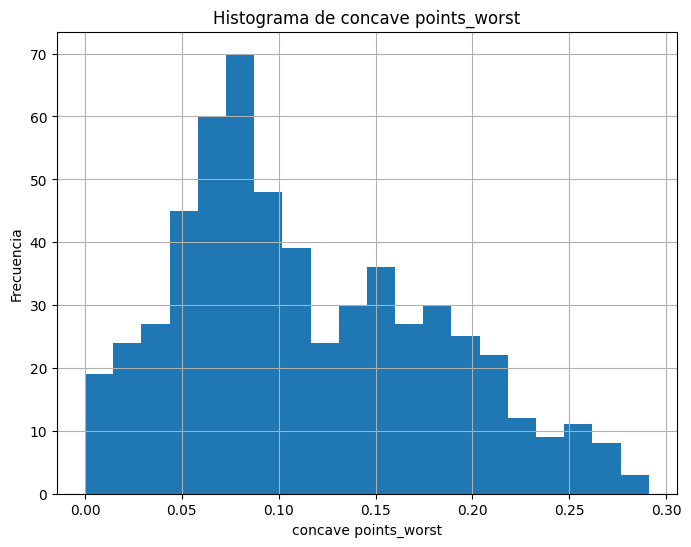

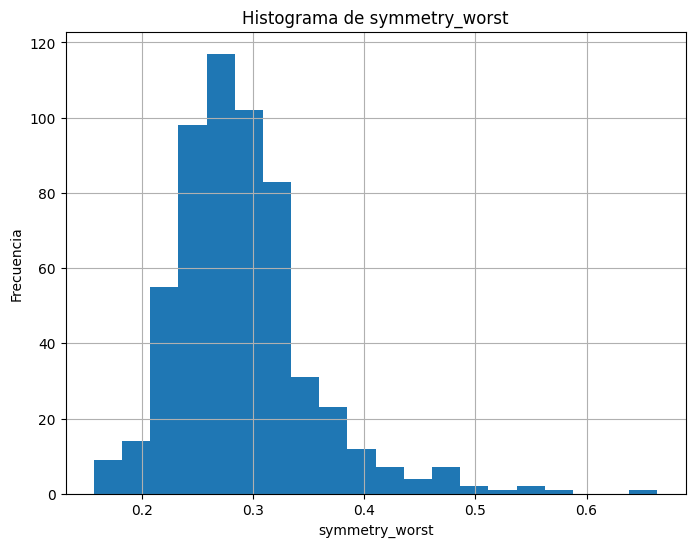

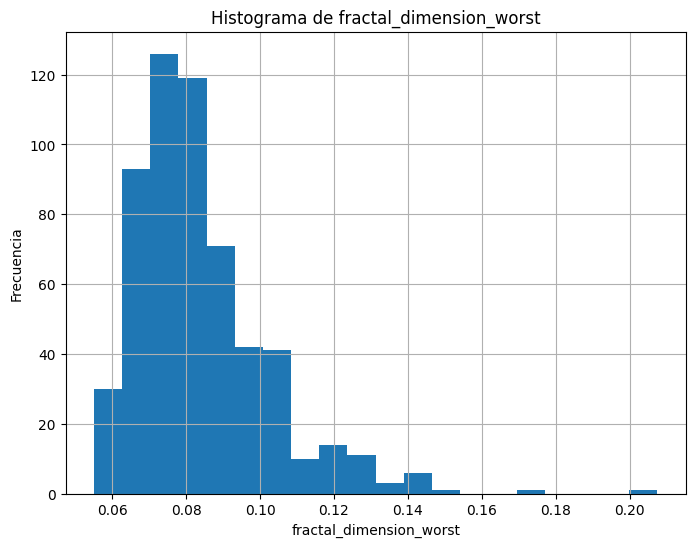

In [11]:
#Histogramas

col = data2.columns
for name in col:
    plt.figure(figsize=(8, 6)) #Aumento el tamaño para que se pueda ver mejor
    data[name].hist(bins=20) 
    plt.title(f'Histograma de {name}')  # Título con el nombre de la columna
    plt.xlabel(name)  #Coloco las etiquetas en cada eje, para que se puedan ver
    plt.ylabel('Frecuencia')  
    plt.show()

Visualmente observamos que **hay más tumores benignos que malignos**.
En general observamos pocos casos de valores altos aislados, claramente **outliers**.


#### 3.4 - Detección de outliers con boxplot

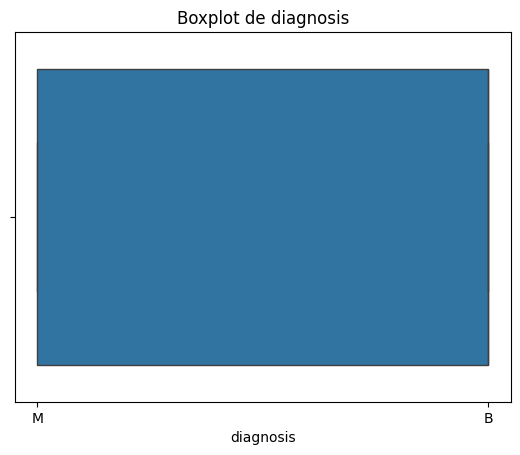

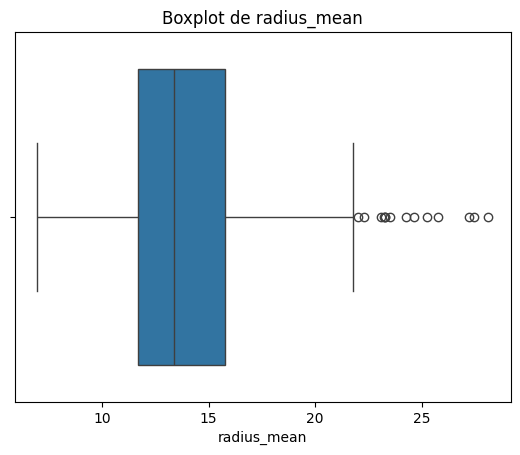

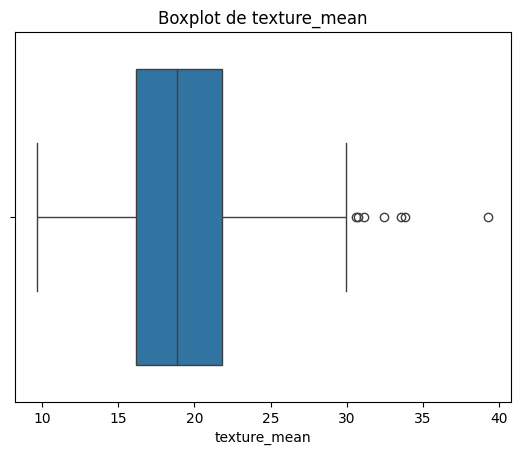

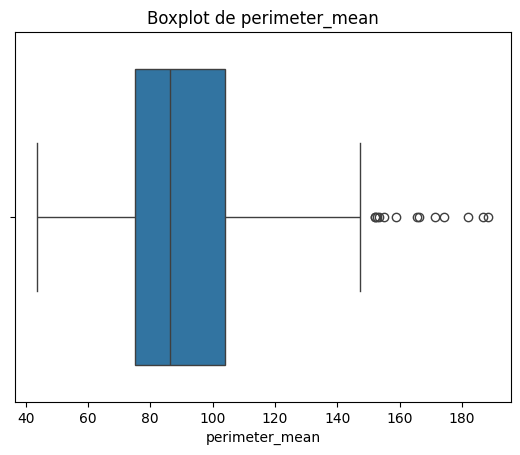

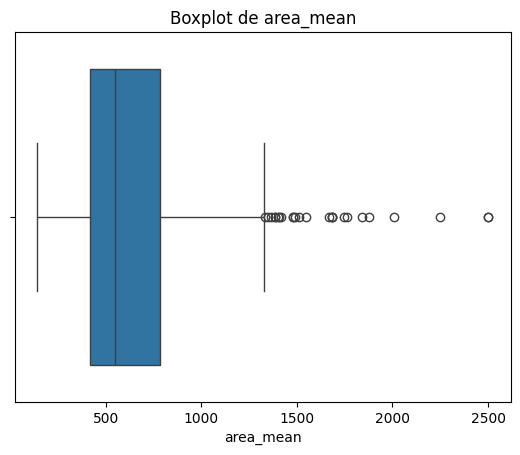

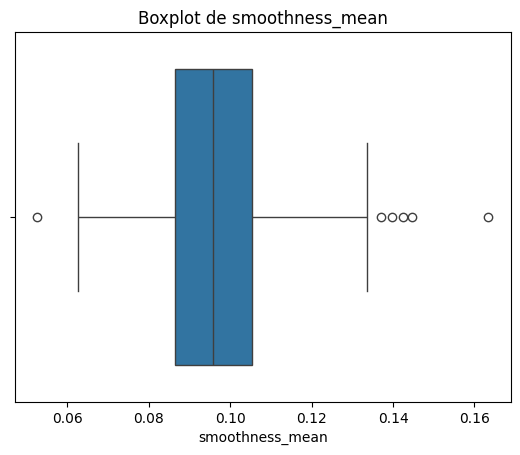

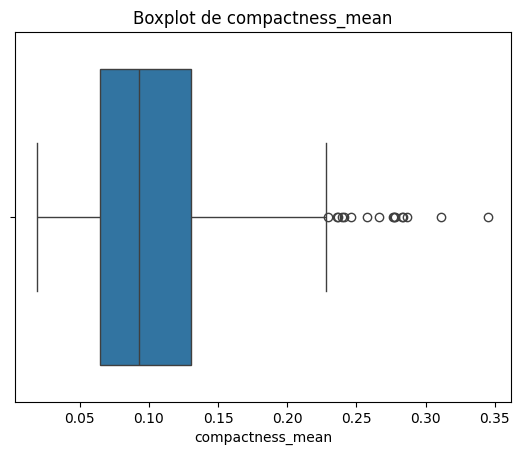

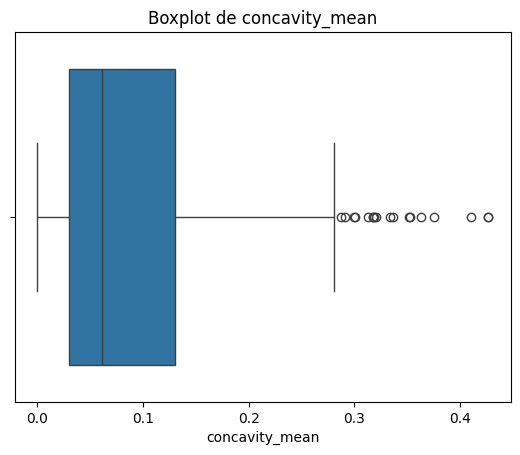

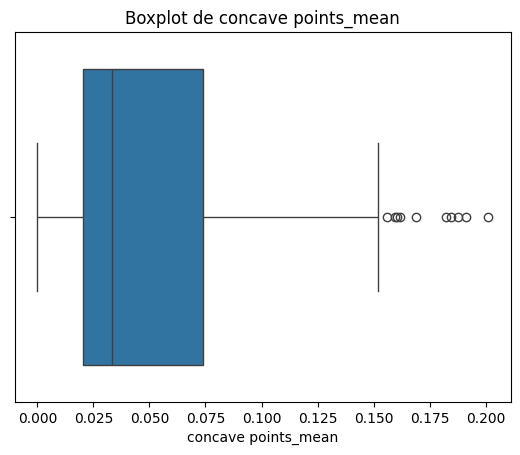

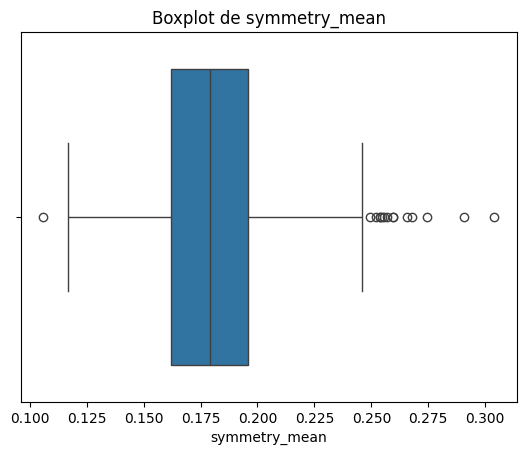

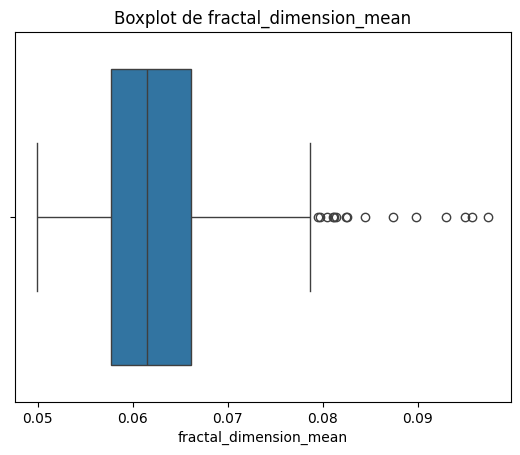

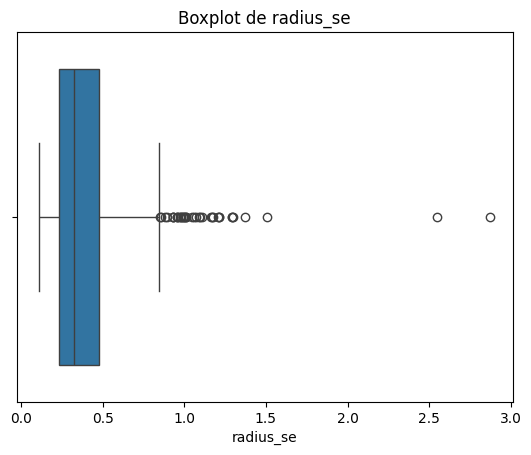

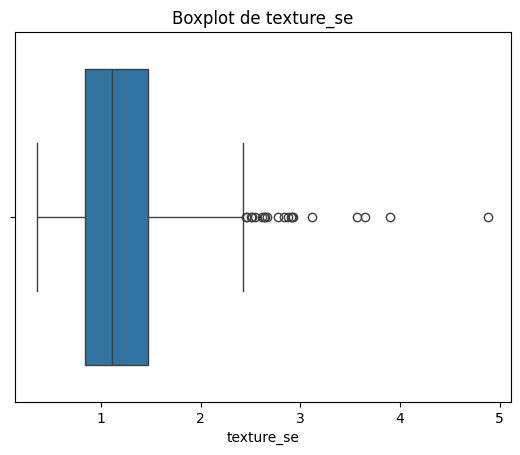

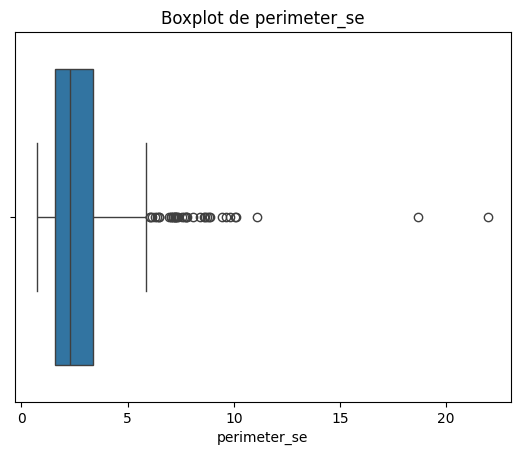

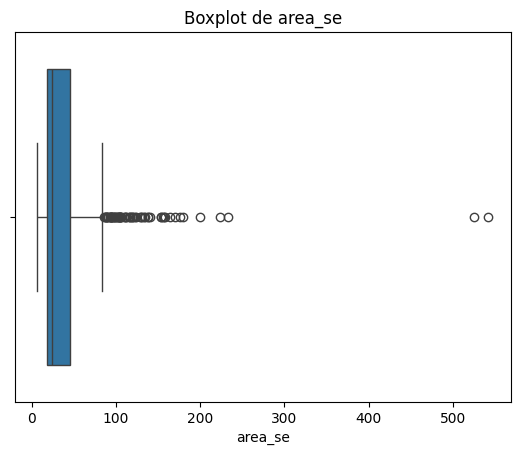

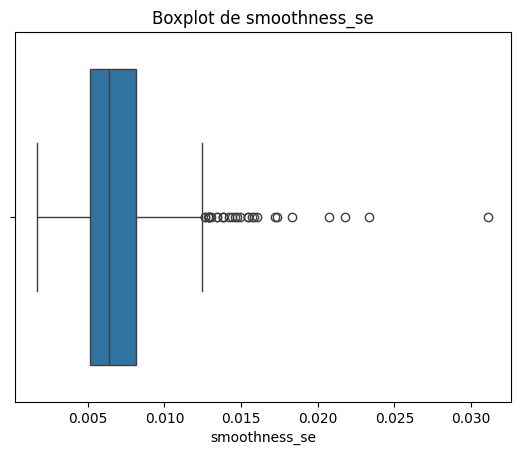

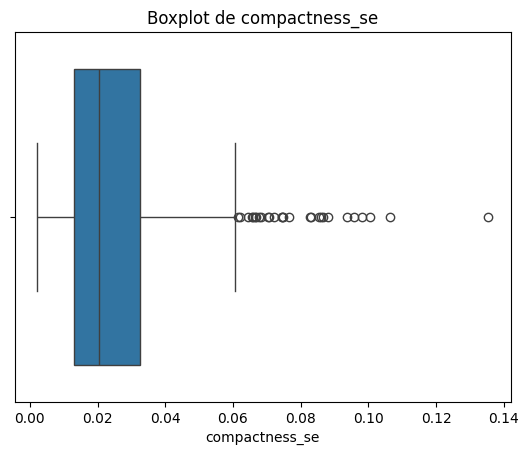

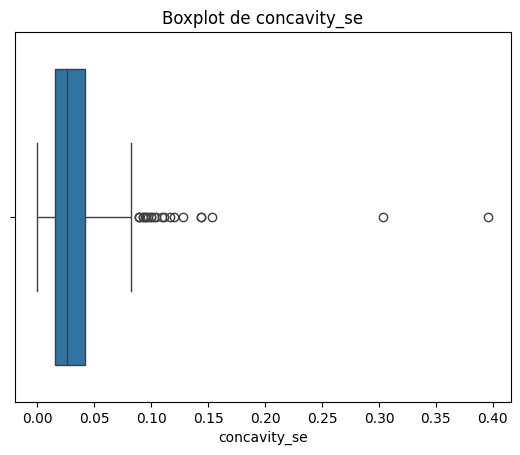

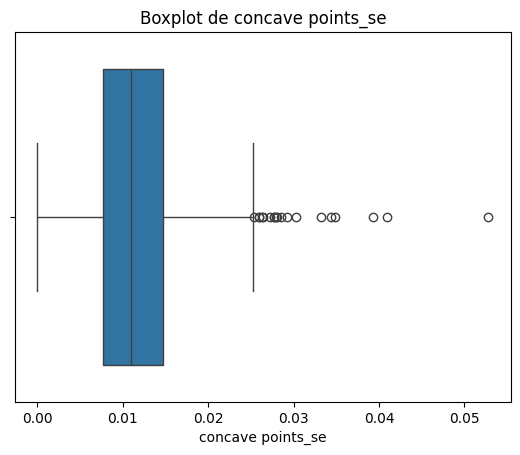

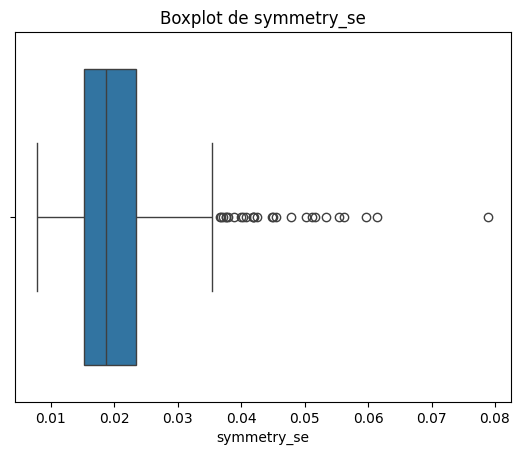

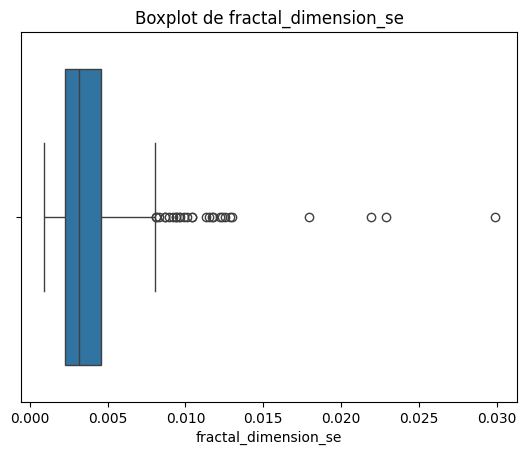

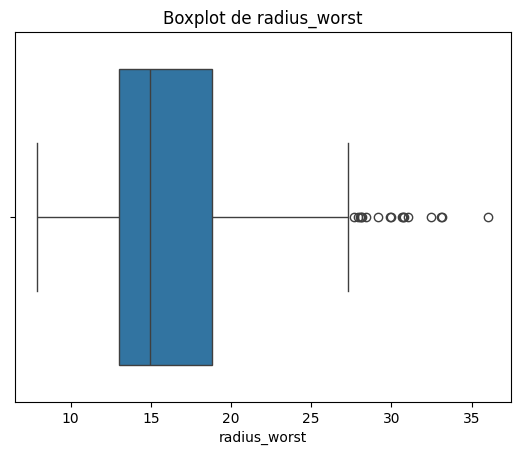

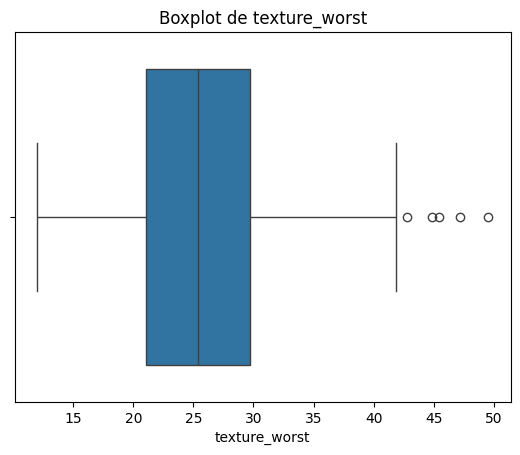

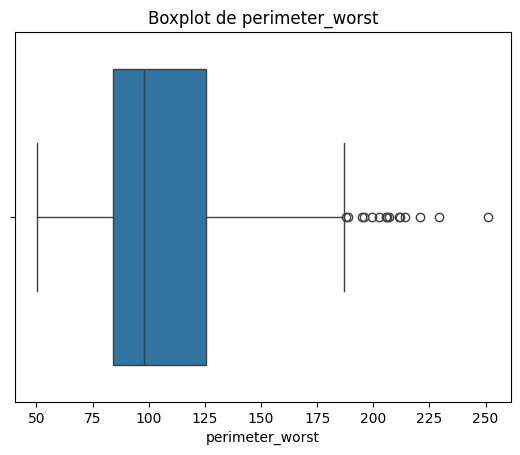

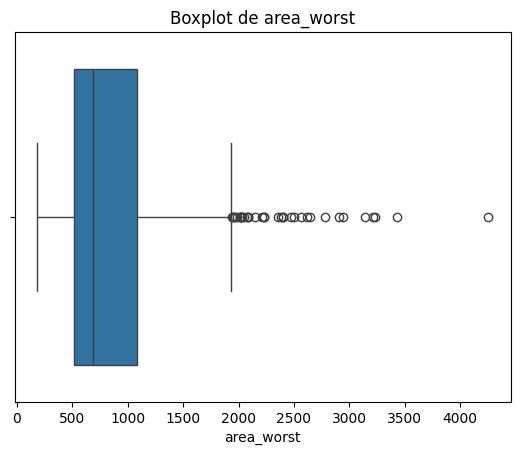

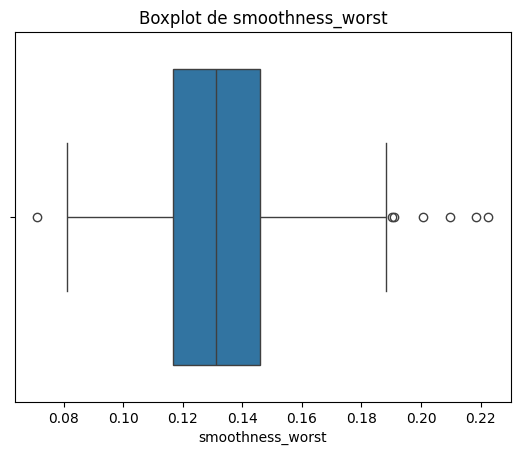

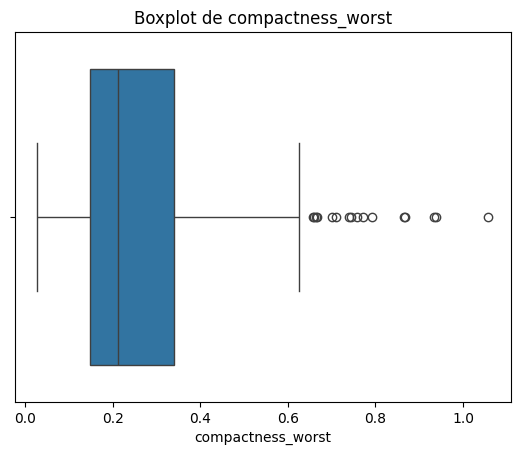

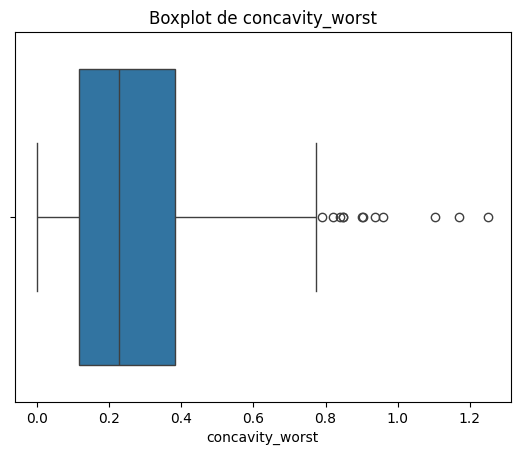

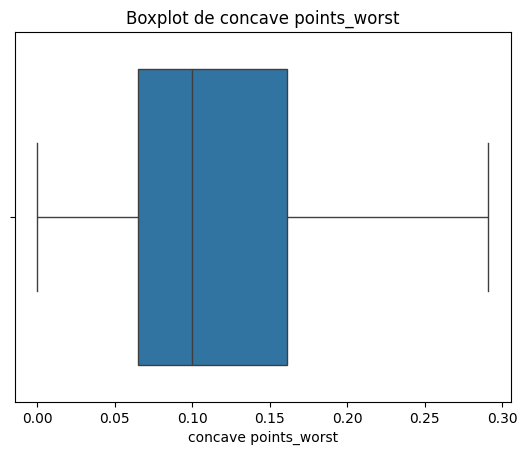

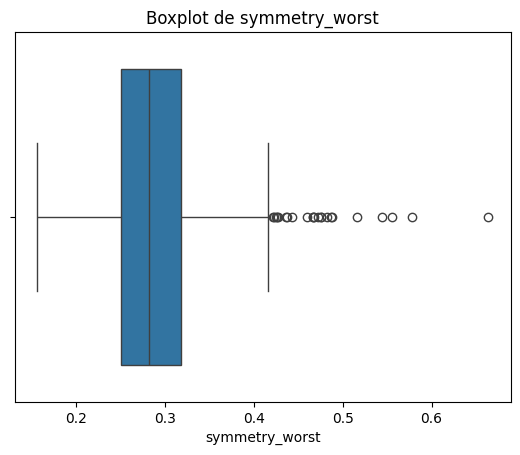

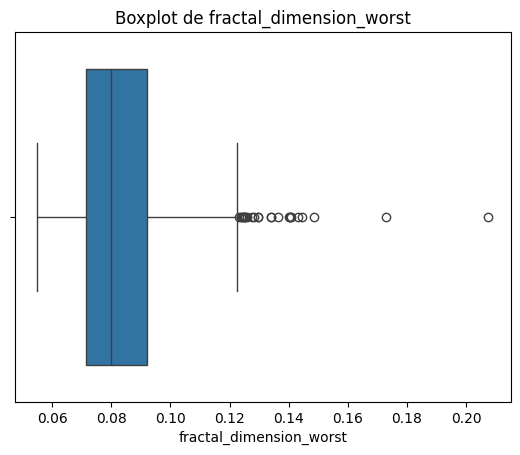

In [12]:
for name in col:
    sns.boxplot(x=data2[name])  
    plt.title(f'Boxplot de {name}')
    plt.show()

### 4-Análisis de relaciones

#### 4.1- Matriz de correlacción

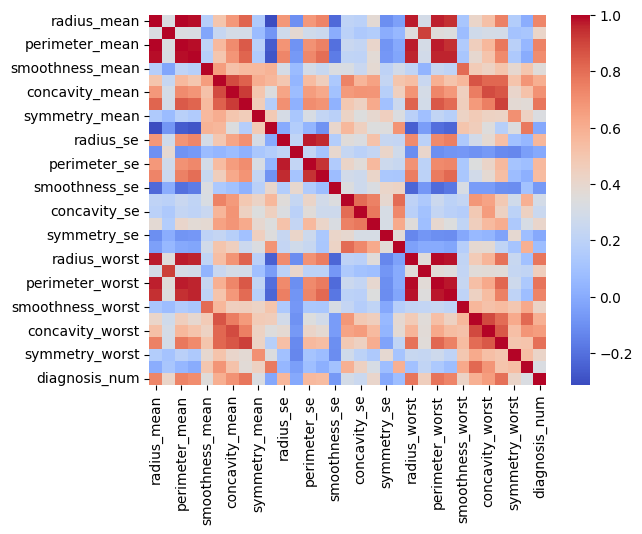

In [13]:
#Primero para diagnosis tengo que transformarlo a numérico.
data2['diagnosis_num'] = data2['diagnosis'].map({'B':0,'M':1}) #Benigno será 0 y maligno será 1
data2_numeric = data2.select_dtypes(include=['float64', 'int64'])

correlation = data2_numeric.corr()
sns.heatmap(correlation, annot=False, cmap='coolwarm') 
plt.show()

#### 4.2 - Gráficos de dispersión

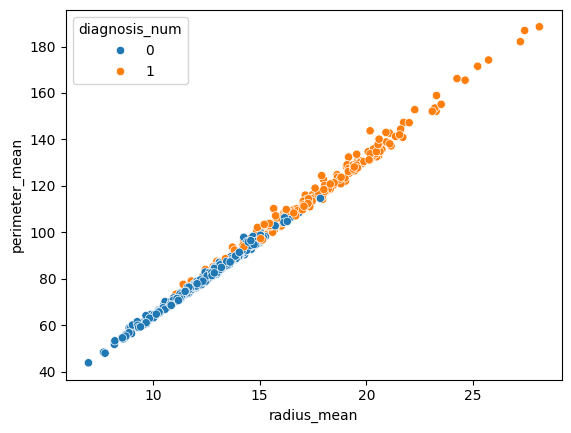

In [14]:
sns.scatterplot(x='radius_mean', y='perimeter_mean', hue='diagnosis_num', data=data2) 
plt.show()

Se ve que a mayor perímetro y radio, más casos se diagnostican como tumor maligno

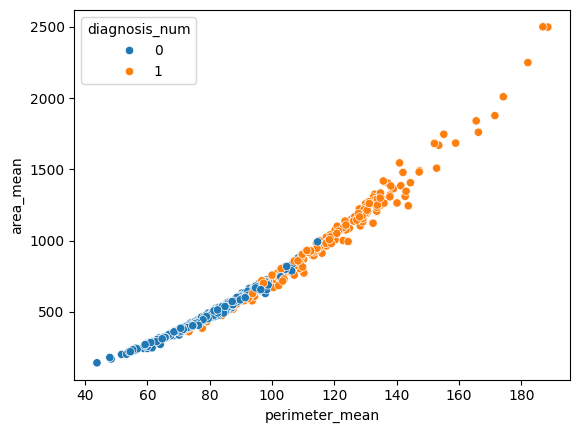

In [15]:
sns.scatterplot(x='perimeter_mean', y='area_mean', hue='diagnosis_num', data=data2) 
plt.show()

A mayor **perímetro y área** parece que también aumentan mucho los casos de tumores malignos